In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
df_test=pd.read_excel('E:/food_Test.xlsx')
df_train=pd.read_excel('E:/food_Train.xlsx')

In [83]:
df_cost=df_train.append(df_test)

In [84]:
df_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


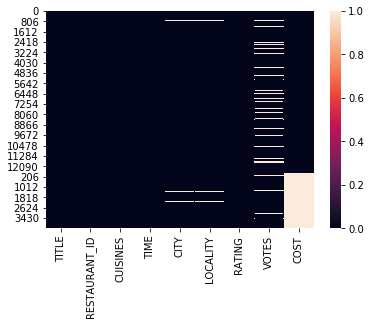

In [85]:
#checking for any missing data
sns.heatmap(df_cost.isnull())

In [86]:
df_cost.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [87]:
df_cost.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [88]:
df_cost['VOTES']=df_cost['VOTES'].str.split(' ').str[0]

In [89]:
df_cost['VOTES']=df_cost['VOTES'].astype(float)

In [90]:
df_cost['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [91]:
df_cost['RATING'].replace('NEW',int(0),inplace=True)

In [92]:
df_cost['RATING'].replace('-',int(0),inplace=True)

In [93]:
df_cost['RATING']=df_cost['RATING'].astype(float)

In [94]:
cuisines = list(df_cost['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("Maximum cuisines in a Cell : ", maxim)

Maximum cuisines in a Cell :  8


In [95]:
df_cost['CUISINES_1']=df_cost['CUISINES'].str.split(',').str[0]

In [96]:
df_cost['CUISINES_2']=df_cost['CUISINES'].str.split(',').str[1]

In [97]:
df_cost['CUISINES_3']=df_cost['CUISINES'].str.split(',').str[2]

In [98]:
df_cost['CUISINES_4']=df_cost['CUISINES'].str.split(',').str[3]
df_cost['CUISINES_5']=df_cost['CUISINES'].str.split(',').str[4]
df_cost['CUISINES_6']=df_cost['CUISINES'].str.split(',').str[5]
df_cost['CUISINES_7']=df_cost['CUISINES'].str.split(',').str[6]
df_cost['CUISINES_8']=df_cost['CUISINES'].str.split(',').str[7]

In [99]:
print(df_cost['CUISINES_1'].value_counts())
print(df_cost['CUISINES_2'].value_counts())
print(df_cost['CUISINES_3'].value_counts())
print(df_cost['CUISINES_4'].value_counts())
print(df_cost['CUISINES_5'].value_counts())
print(df_cost['CUISINES_6'].value_counts())
print(df_cost['CUISINES_7'].value_counts())
print(df_cost['CUISINES_8'].value_counts())

North Indian     4261
South Indian     1637
Chinese          1315
Fast Food        1008
Cafe              967
                 ... 
Pakistani           1
Multi Cuisine       1
Egyptian            1
Roast Chicken       1
Afghan              1
Name: CUISINES_1, Length: 106, dtype: int64
 Chinese          2521
 North Indian     1786
 Fast Food        1076
 South Indian      845
 Continental       693
                  ... 
 Tamil               1
 Belgian             1
 Hawaiian            1
 Mishti              1
 Roast Chicken       1
Name: CUISINES_2, Length: 100, dtype: int64
 Chinese              1499
 North Indian          780
 Fast Food             514
 Continental           460
 Italian               385
                      ... 
 Tamil                   1
 Kashmiri                1
 Egyptian                1
 Turkish                 1
 Modern Australian       1
Name: CUISINES_3, Length: 100, dtype: int64
 Chinese           376
 North Indian      281
 Italian           212
 Contin

In [100]:
timings = list(df_cost['TIME'])

maxim = 1
for i in timings:
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("Maximum TIMINGS in a Cell : ", maxim)

Maximum TIMINGS in a Cell :  7


In [101]:
df_cost['TIME_1']=df_cost['TIME'].str.split(',').str[0]

In [102]:
df_cost['TIME_2']=df_cost['TIME'].str.split(',').str[1]

In [103]:
df_cost['TIME_3']=df_cost['TIME'].str.split(',').str[2]

In [104]:
df_cost['TIME_4']=df_cost['TIME'].str.split(',').str[3]

In [105]:
df_cost['TIME_5']=df_cost['TIME'].str.split(',').str[4]

In [106]:
df_cost['TIME_6']=df_cost['TIME'].str.split(',').str[5]
df_cost['TIME_7']=df_cost['TIME'].str.split(',').str[6]

In [107]:
print(df_cost['TIME_1'].value_counts())
print(df_cost['TIME_2'].value_counts())
print(df_cost['TIME_3'].value_counts())
print(df_cost['TIME_4'].value_counts())
print(df_cost['TIME_5'].value_counts())
print(df_cost['TIME_6'].value_counts())
print(df_cost['TIME_7'].value_counts())

11am – 11pm (Mon-Sun)            1862
12noon – 12midnight (Mon-Sun)     615
12noon – 11pm (Mon-Sun)           541
11am – 12midnight (Mon-Sun)       419
12noon – 3:30pm                   413
                                 ... 
6pm – 11pm (Mon)                    1
6am – 11:30am (Mon-Sun)             1
8am – 12:15AM (Mon-Sun)             1
9:30am – 5:30pm (Mon-Sat)           1
8pm – 1am (Mon-Sat)                 1
Name: TIME_1, Length: 1620, dtype: int64
 7pm – 11pm (Mon-Sun)         407
 Tue                          364
 Wed                          179
 7pm – 11:30pm (Mon-Sun)      161
 6:30pm – 11pm (Mon-Sun)      140
                             ... 
 7pm – 11:45pm...               1
 3:30pm – 8:30pm (Mon           1
11:30am – 3:30pm (Sat-Sun)      1
12noon – 9:30pm (Tue-Sun)       1
8am – 10pm (Tue-Sun)            1
Name: TIME_2, Length: 1030, dtype: int64
 Wed                        366
 Thu                        217
12noon –...                  58
 Tue                         5

In [108]:
title = list(df_cost['TITLE'])

maxim = 1
for i in title:
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("Maximum title in a Cell : ", maxim)

Maximum title in a Cell :  2


In [109]:
df_cost['TITLE_1']=df_cost['TITLE'].str.split(',').str[0]
df_cost['TITLE_2']=df_cost['TITLE'].str.split(',').str[1]

In [110]:
print(df_cost['TITLE_1'].value_counts())
print(df_cost['TITLE_2'].value_counts())

QUICK BITES       5793
CASUAL DINING     5516
None              1287
CAFÉ              1024
DESSERT PARLOR     625
BAKERY             604
FINE DINING        457
BAR                336
BEVERAGE SHOP      292
LOUNGE             209
SWEET SHOP         148
PUB                145
FOOD COURT         126
KIOSK               76
MESS                68
MICROBREWERY        62
DHABA               61
FOOD TRUCK          38
CLUB                33
COCKTAIL BAR         7
PAAN SHOP            5
CONFECTIONERY        4
MEAT SHOP            3
IRANI CAFE           1
BHOJANALYA           1
Name: TITLE_1, dtype: int64
BAR               564
QUICK BITES       351
CASUAL DINING     349
DESSERT PARLOR    170
CAFÉ              116
BAKERY            103
SWEET SHOP         70
LOUNGE             54
PUB                44
BEVERAGE SHOP      39
MICROBREWERY       36
FOOD COURT         18
FINE DINING        11
CLUB                6
KIOSK               4
IRANI CAFE          4
CONFECTIONERY       2
FOOD TRUCK          1
M

In [111]:
df_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_1,...,CUISINES_8,TIME_1,TIME_2,TIME_3,TIME_4,TIME_5,TIME_6,TIME_7,TITLE_1,TITLE_2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Malwani,...,NaN,11am – 4pm,7:30pm – 11:30pm (Mon-Sun),NaN,NaN,NaN,NaN,NaN,CASUAL DINING,NaN
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Asian,...,NaN,6pm – 11pm (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,North Indian,...,NaN,11am – 3:30pm,7pm – 11pm (Mon-Sun),NaN,NaN,NaN,NaN,NaN,CASUAL DINING,NaN
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Tibetan,...,NaN,11:30am – 1am (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,QUICK BITES,NaN
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Desserts,...,NaN,11am – 1am (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,DESSERT PARLOR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,North Indian,...,NaN,11:30am – 11:30pm (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,CASUAL DINING,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,Biryani,...,NaN,11am – 1am (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53.0,NaN,Continental,...,NaN,9:30am – 10:30pm (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,QUICK BITES,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,0.0,NaN,NaN,Rolls,...,NaN,11am – 11:30pm (Mon,Tue,Wed,Thu,Sat,Sun),3pm...,QUICK BITES,NaN


In [112]:
df_cost.isnull().sum()

TITLE                0
RESTAURANT_ID        0
CUISINES             0
TIME                 0
CITY               147
LOCALITY           128
RATING               4
VOTES             1606
COST              4231
CUISINES_1           0
CUISINES_2        4047
CUISINES_3        9330
CUISINES_4       13309
CUISINES_5       15550
CUISINES_6       16370
CUISINES_7       16671
CUISINES_8       16813
TIME_1               0
TIME_2           12609
TIME_3           15604
TIME_4           16232
TIME_5           16318
TIME_6           16490
TIME_7           16785
TITLE_1              0
TITLE_2          14977
dtype: int64

In [113]:
df_cost['CUISINES_2'].replace(np.NaN,'NONE',inplace=True)
df_cost['CUISINES_3'].replace(np.NaN,'NONE',inplace=True)
df_cost['CUISINES_4'].replace(np.NaN,'NONE',inplace=True)
df_cost['CUISINES_5'].replace(np.NaN,'NONE',inplace=True)
df_cost['CUISINES_6'].replace(np.NaN,'NONE',inplace=True)
df_cost['CUISINES_7'].replace(np.NaN,'NONE',inplace=True)
df_cost['CUISINES_8'].replace(np.NaN,'NONE',inplace=True)

df_cost['TIME_2'].replace(np.NaN,'NONE',inplace=True)
df_cost['TIME_3'].replace(np.NaN,'NONE',inplace=True)
df_cost['TIME_4'].replace(np.NaN,'NONE',inplace=True)
df_cost['TIME_5'].replace(np.NaN,'NONE',inplace=True)
df_cost['TIME_6'].replace(np.NaN,'NONE',inplace=True)
df_cost['TIME_7'].replace(np.NaN,'NONE',inplace=True)
df_cost['TITLE_2'].replace(np.NaN,'NONE',inplace=True)

df_cost['RATING'].replace(np.NaN,df_cost['RATING'].mean(),inplace=True)
df_cost['VOTES'].replace(np.NaN,df_cost['VOTES'].mean(),inplace=True)


In [114]:
df_cost.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              0
VOTES               0
COST             4231
CUISINES_1          0
CUISINES_2          0
CUISINES_3          0
CUISINES_4          0
CUISINES_5          0
CUISINES_6          0
CUISINES_7          0
CUISINES_8          0
TIME_1              0
TIME_2              0
TIME_3              0
TIME_4              0
TIME_5              0
TIME_6              0
TIME_7              0
TITLE_1             0
TITLE_2             0
dtype: int64

In [115]:
df_cost.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST             float64
CUISINES_1        object
CUISINES_2        object
CUISINES_3        object
CUISINES_4        object
CUISINES_5        object
CUISINES_6        object
CUISINES_7        object
CUISINES_8        object
TIME_1            object
TIME_2            object
TIME_3            object
TIME_4            object
TIME_5            object
TIME_6            object
TIME_7            object
TITLE_1           object
TITLE_2           object
dtype: object

In [116]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [117]:
df_cost['COST'].replace(np.NaN,int(0),inplace=True)

In [118]:
df_cost.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             147
LOCALITY         128
RATING             0
VOTES              0
COST               0
CUISINES_1         0
CUISINES_2         0
CUISINES_3         0
CUISINES_4         0
CUISINES_5         0
CUISINES_6         0
CUISINES_7         0
CUISINES_8         0
TIME_1             0
TIME_2             0
TIME_3             0
TIME_4             0
TIME_5             0
TIME_6             0
TIME_7             0
TITLE_1            0
TITLE_2            0
dtype: int64

In [119]:
df_cost.dropna(inplace=True)

In [120]:
df_cost.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
TIME_1           0
TIME_2           0
TIME_3           0
TIME_4           0
TIME_5           0
TIME_6           0
TIME_7           0
TITLE_1          0
TITLE_2          0
dtype: int64

In [121]:
df_cost.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3',
       'CUISINES_4', 'CUISINES_5', 'CUISINES_6', 'CUISINES_7', 'CUISINES_8',
       'TIME_1', 'TIME_2', 'TIME_3', 'TIME_4', 'TIME_5', 'TIME_6', 'TIME_7',
       'TITLE_1', 'TITLE_2'],
      dtype='object')

In [122]:
df_cost.drop(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME'],axis=1,inplace=True)

In [123]:
df_cost.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'CUISINES_1',
       'CUISINES_2', 'CUISINES_3', 'CUISINES_4', 'CUISINES_5', 'CUISINES_6',
       'CUISINES_7', 'CUISINES_8', 'TIME_1', 'TIME_2', 'TIME_3', 'TIME_4',
       'TIME_5', 'TIME_6', 'TIME_7', 'TITLE_1', 'TITLE_2'],
      dtype='object')

In [124]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cost['CITY']=le.fit_transform(df_cost['CITY'])
df_cost['LOCALITY']=le.fit_transform(df_cost['LOCALITY'])

df_cost['CUISINES_1']=le.fit_transform(df_cost['CUISINES_1'])
df_cost['CUISINES_2']=le.fit_transform(df_cost['CUISINES_2'])
df_cost['CUISINES_3']=le.fit_transform(df_cost['CUISINES_3'])
df_cost['CUISINES_4']=le.fit_transform(df_cost['CUISINES_4'])
df_cost['CUISINES_5']=le.fit_transform(df_cost['CUISINES_5'])
df_cost['CUISINES_6']=le.fit_transform(df_cost['CUISINES_6'])
df_cost['CUISINES_7']=le.fit_transform(df_cost['CUISINES_7'])
df_cost['CUISINES_8']=le.fit_transform(df_cost['CUISINES_8'])

df_cost['TIME_1']=le.fit_transform(df_cost['TIME_1'])
df_cost['TIME_2']=le.fit_transform(df_cost['TIME_2'])
df_cost['TIME_3']=le.fit_transform(df_cost['TIME_3'])
df_cost['TIME_4']=le.fit_transform(df_cost['TIME_4'])
df_cost['TIME_5']=le.fit_transform(df_cost['TIME_5'])
df_cost['TIME_6']=le.fit_transform(df_cost['TIME_6'])
df_cost['TIME_7']=le.fit_transform(df_cost['TIME_7'])

df_cost['TITLE_1']=le.fit_transform(df_cost['TITLE_1'])
df_cost['TITLE_2']=le.fit_transform(df_cost['TITLE_2'])

In [125]:
df_cost.skew()

CITY           0.238861
LOCALITY       0.356655
RATING        -2.218119
VOTES         12.985798
COST           3.713034
CUISINES_1    -0.016882
CUISINES_2     0.058195
CUISINES_3    -0.830047
CUISINES_4    -2.111315
CUISINES_5    -4.095052
CUISINES_6    -6.720127
CUISINES_7   -10.055783
CUISINES_8   -13.407120
TIME_1         0.634149
TIME_2        -1.523256
TIME_3        -4.293818
TIME_4        -6.852486
TIME_5        -7.544577
TIME_6       -12.518990
TIME_7       -18.454878
TITLE_1        0.087449
TITLE_2       -3.068941
dtype: float64

In [126]:
df_cost.corr()

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,...,CUISINES_8,TIME_1,TIME_2,TIME_3,TIME_4,TIME_5,TIME_6,TIME_7,TITLE_1,TITLE_2
CITY,1.000000,0.035590,-0.058852,0.051836,0.032428,0.013443,0.009173,0.011191,-0.001978,-0.006035,...,-0.002205,0.001170,0.072135,0.030377,-0.028195,-0.014022,0.027138,-0.011467,-0.015245,-0.018215
LOCALITY,0.035590,1.000000,-0.021462,-0.028544,-0.010761,0.020786,0.020482,0.016133,0.017478,0.013432,...,0.012161,-0.009465,0.006742,-0.000665,-0.001522,-0.001634,-0.000541,0.002320,0.034881,0.015584
RATING,-0.058852,-0.021462,1.000000,0.121210,0.179076,-0.022133,-0.092556,-0.116925,-0.118576,-0.080825,...,-0.030182,-0.043118,-0.131333,-0.076795,-0.041703,-0.041203,-0.031610,-0.008593,-0.115016,-0.101391
VOTES,0.051836,-0.028544,0.121210,1.000000,0.181295,-0.041735,-0.076054,-0.132514,-0.128075,-0.095653,...,-0.049322,-0.018723,-0.077519,-0.047663,-0.023024,-0.030173,-0.042119,-0.002250,-0.133242,-0.155506
COST,0.032428,-0.010761,0.179076,0.181295,1.000000,-0.028731,-0.052933,-0.135370,-0.132017,-0.084895,...,-0.029177,-0.011818,-0.128145,-0.069986,-0.036887,-0.033116,-0.055056,-0.001244,-0.227869,-0.207714
CUISINES_1,0.013443,0.020786,-0.022133,-0.041735,-0.028731,1.000000,0.039370,-0.018746,0.033938,0.029330,...,0.030817,0.099402,-0.043287,-0.005653,0.023835,0.019307,0.030915,0.017396,0.217958,0.092327
CUISINES_2,0.009173,0.020482,-0.092556,-0.076054,-0.052933,0.039370,1.000000,0.260036,0.157572,0.097414,...,0.041621,0.096925,-0.008307,0.001445,0.019417,0.018129,0.021219,0.008399,0.143602,0.132238
CUISINES_3,0.011191,0.016133,-0.116925,-0.132514,-0.135370,-0.018746,0.260036,1.000000,0.384096,0.217426,...,0.081634,0.031768,0.021559,0.011721,0.012925,0.011203,0.023936,0.007389,0.176006,0.133911
CUISINES_4,-0.001978,0.017478,-0.118576,-0.128075,-0.132017,0.033938,0.157572,0.384096,1.000000,0.415143,...,0.126356,0.015908,0.032130,0.028027,0.017143,0.011690,0.028155,0.001343,0.152022,0.140452
CUISINES_5,-0.006035,0.013432,-0.080825,-0.095653,-0.084895,0.029330,0.097414,0.217426,0.415143,1.000000,...,0.225496,-0.010024,0.019733,0.021475,0.020231,0.008894,0.027698,0.000932,0.110770,0.101702


In [127]:
df_train=df_cost[0:12690]
df_test=df_cost[12690:]

In [128]:
df_train

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,...,CUISINES_8,TIME_1,TIME_2,TIME_3,TIME_4,TIME_5,TIME_6,TIME_7,TITLE_1,TITLE_2
0,399,328,3.6,49.000000,1200.0,61,32,71,89,83,...,21,385,280,211,43,39,49,32,5,16
1,75,1210,4.2,30.000000,1500.0,6,62,45,89,83,...,21,1093,1016,211,43,39,49,32,5,1
2,75,1268,3.8,221.000000,800.0,74,23,14,34,83,...,21,367,338,211,43,39,49,32,5,16
3,276,161,4.1,24.000000,800.0,102,23,100,89,83,...,21,200,1016,211,43,39,49,32,23,16
4,276,708,3.8,165.000000,300.0,30,100,100,89,83,...,21,355,1016,211,43,39,49,32,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,215,1494,0.0,419.194254,0.0,10,100,100,89,83,...,21,1476,1016,211,43,39,49,32,0,16
109,276,136,3.9,476.000000,0.0,27,68,100,89,83,...,21,342,1016,211,43,39,49,32,5,16
110,75,1492,3.5,19.000000,0.0,10,100,100,89,83,...,21,1576,1012,211,43,39,49,32,20,16
111,146,1117,3.7,50.000000,0.0,10,100,100,89,83,...,21,75,1016,211,43,39,49,32,0,16


In [129]:
df_train.skew()

CITY           0.244421
LOCALITY       0.351025
RATING        -2.223738
VOTES         14.753086
COST           3.953037
CUISINES_1    -0.005216
CUISINES_2     0.043602
CUISINES_3    -0.823789
CUISINES_4    -2.111283
CUISINES_5    -4.125818
CUISINES_6    -6.799417
CUISINES_7   -10.497016
CUISINES_8   -13.806231
TIME_1         0.641197
TIME_2        -1.507841
TIME_3        -4.268811
TIME_4        -6.931031
TIME_5        -7.343737
TIME_6       -12.292635
TIME_7       -18.216508
TITLE_1        0.082769
TITLE_2       -3.044271
dtype: float64

In [130]:
#removing skewness using log transform
for col in df_train.columns:
    if df_train.skew().loc[col]>0.55:
        df_train[col]=np.log1p(df_train[col])

In [131]:
df_train.skew()

CITY           0.244421
LOCALITY       0.351025
RATING        -2.223738
VOTES         -0.164432
COST          -2.315568
CUISINES_1    -0.005216
CUISINES_2     0.043602
CUISINES_3    -0.823789
CUISINES_4    -2.111283
CUISINES_5    -4.125818
CUISINES_6    -6.799417
CUISINES_7   -10.497016
CUISINES_8   -13.806231
TIME_1        -1.328340
TIME_2        -1.507841
TIME_3        -4.268811
TIME_4        -6.931031
TIME_5        -7.343737
TIME_6       -12.292635
TIME_7       -18.216508
TITLE_1        0.082769
TITLE_2       -3.044271
dtype: float64

In [132]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_train))
print(zscore)
print(np.where(zscore>3))
df_train_new=df_train[(zscore<3).all(axis=1)]

[[2.09087849 0.92891933 0.14660605 ... 0.06267765 0.89678383 0.27235593]
 [0.93707628 0.99540657 0.65690781 ... 0.06267765 0.89678383 3.73034257]
 [0.93707628 1.12194955 0.31670664 ... 0.06267765 0.89678383 0.27235593]
 ...
 [0.93707628 1.61066724 0.06155576 ... 0.06267765 0.80408704 0.27235593]
 [0.27354298 0.79250146 0.23165634 ... 0.06267765 1.46374078 0.27235593]
 [1.30585318 1.38594437 0.48680722 ... 0.06267765 0.80408704 0.27235593]]
(array([    1,     6,     6, ..., 12687, 12688, 12689], dtype=int64), array([21,  9, 15, ...,  4,  4,  4], dtype=int64))


In [133]:
print('Before removing outliers:',df_train.shape)
print('After removing outliers:',df_train_new.shape)

Before removing outliers: (12690, 22)
After removing outliers: (10523, 22)


In [134]:
#separating into input and output variables
df_x=df_train_new.drop(columns=['COST'])
y=pd.DataFrame(df_train_new['COST'])

In [135]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [136]:
x.shape


(10523, 21)

In [137]:
y.shape

(10523, 1)

In [138]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [139]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.3615051646637001
r2 score corresponding to 43 is 0.33558101497886084
r2 score corresponding to 44 is 0.3490570385495908
r2 score corresponding to 45 is 0.33347953479210635
r2 score corresponding to 46 is 0.3208376022896605
r2 score corresponding to 47 is 0.34525203418202655
r2 score corresponding to 48 is 0.33142054103766394
r2 score corresponding to 49 is 0.3534745015940989
r2 score corresponding to 50 is 0.3521410354531487
r2 score corresponding to 51 is 0.34932942718592563
r2 score corresponding to 52 is 0.3194226130939307
r2 score corresponding to 53 is 0.34334368067385324
r2 score corresponding to 54 is 0.3278029572681489
r2 score corresponding to 55 is 0.3512677567573603
r2 score corresponding to 56 is 0.337223370906625
r2 score corresponding to 57 is 0.3320708796305797
r2 score corresponding to 58 is 0.3548600784101461
r2 score corresponding to 59 is 0.35734196184547584
r2 score corresponding to 60 is 0.3350173031868797
r2 score corresponding to

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 10}

In [63]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=11)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.4459022439559366
r2 score corresponding to 43 is 0.43513546440328055
r2 score corresponding to 44 is 0.4364168969316463
r2 score corresponding to 45 is 0.4298551113722714
r2 score corresponding to 46 is 0.42608497990876804
r2 score corresponding to 47 is 0.4244131892994456
r2 score corresponding to 48 is 0.4198253825433027
r2 score corresponding to 49 is 0.4266845976829935
r2 score corresponding to 50 is 0.4290664659464183
r2 score corresponding to 51 is 0.4538946821798092
r2 score corresponding to 52 is 0.4198472426169406
r2 score corresponding to 53 is 0.4396914395480199
r2 score corresponding to 54 is 0.4331678749607344
r2 score corresponding to 55 is 0.4408201899733688
r2 score corresponding to 56 is 0.4338379479354949
r2 score corresponding to 57 is 0.4256489280349448
r2 score corresponding to 58 is 0.44488865814344614
r2 score corresponding to 59 is 0.457965320165744
r2 score corresponding to 60 is 0.4371149709753437
r2 score corresponding to 61 

In [141]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [142]:
#Using cross val score to check the mean r2 score and standard deviation
from sklearn.model_selection import cross_val_score
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.7076018306746678
Standard Deviation in r2 score for Gradient Boosting Regression: 0.011094432151437537


In [255]:
#checking maximum r2 score corresponding to Gradient Boost
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to 42 is 0.7117206242269052
r2 score corresponding to 43 is 0.7115077148382869
r2 score corresponding to 44 is 0.704412308853789
r2 score corresponding to 45 is 0.6997844006010517
r2 score corresponding to 46 is 0.7119450476660092
r2 score corresponding to 47 is 0.7017399642591924
r2 score corresponding to 48 is 0.6918832852167373
r2 score corresponding to 49 is 0.6973917337509543
r2 score corresponding to 50 is 0.6867728740218586
r2 score corresponding to 51 is 0.7272417719925603
r2 score corresponding to 52 is 0.6932551969905758
r2 score corresponding to 53 is 0.7071145357530788
r2 score corresponding to 54 is 0.6977568010545351
r2 score corresponding to 55 is 0.7379572546774712
r2 score corresponding to 56 is 0.6989639949749076
r2 score corresponding to 57 is 0.7105179607642733
r2 score corresponding to 58 is 0.7273140549831729
r2 score corresponding to 59 is 0.7002618585201387
r2 score corresponding to 60 is 0.7186602884279103
r2 score corresponding to 61 is 

In [66]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,400,450,500],'base_estimator':[lreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [68]:
from sklearn.model_selection import cross_val_score
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=500)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.6857833154097175
Standard Deviation in r2 score for Ada Boost Regression: 0.010795201594114958


In [69]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.6903623502719991
r2 score corresponding to 43 is 0.6874841879021985
r2 score corresponding to 44 is 0.6900357254633857
r2 score corresponding to 45 is 0.6647793156308521
r2 score corresponding to 46 is 0.6831606847689313
r2 score corresponding to 47 is 0.67900949485152
r2 score corresponding to 48 is 0.6658645685807985
r2 score corresponding to 49 is 0.6808629686704308
r2 score corresponding to 50 is 0.6655498618363671
r2 score corresponding to 51 is 0.6979387053990315
r2 score corresponding to 52 is 0.6676459347213466
r2 score corresponding to 53 is 0.6872142208855927
r2 score corresponding to 54 is 0.6883004486003571
r2 score corresponding to 55 is 0.70492152201696
r2 score corresponding to 56 is 0.6725129659998113
r2 score corresponding to 57 is 0.6758840233959662
r2 score corresponding to 58 is 0.697194846422706
r2 score corresponding to 59 is 0.6770632776944019
r2 score corresponding to 60 is 0.6988012303090834
r2 score corresponding to 61 is 0.69

In [70]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [71]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.3612003832611048
r2 score corresponding to 43 is 0.3358847602977827
r2 score corresponding to 44 is 0.3495671545658806
r2 score corresponding to 45 is 0.3334542876827872
r2 score corresponding to 46 is 0.32104156522356886
r2 score corresponding to 47 is 0.3455277188329686
r2 score corresponding to 48 is 0.3314176846482392
r2 score corresponding to 49 is 0.3538693110062372
r2 score corresponding to 50 is 0.35180181560972246
r2 score corresponding to 51 is 0.34942758081855263
r2 score corresponding to 52 is 0.3194443975242919
r2 score corresponding to 53 is 0.3430970732655846
r2 score corresponding to 54 is 0.32822866957746166
r2 score corresponding to 55 is 0.35135890697759975
r2 score corresponding to 56 is 0.33706318857451023
r2 score corresponding to 57 is 0.3320316882318298
r2 score corresponding to 58 is 0.3548064431740696
r2 score corresponding to 59 is 0.35735689972736084
r2 score corresponding to 60 is 0.33505446438208
r2 score corresponding to 

In [72]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.341700432162635
Standard Deviation in r2 score for Lasso Regression: 0.012531009030175153


In [73]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [74]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.36150401023585554
r2 score corresponding to 43 is 0.33558304058134725
r2 score corresponding to 44 is 0.34905762999447976
r2 score corresponding to 45 is 0.33348216505360484
r2 score corresponding to 46 is 0.32083907418120483
r2 score corresponding to 47 is 0.3452542219277944
r2 score corresponding to 48 is 0.3314226338839861
r2 score corresponding to 49 is 0.35347532710018226
r2 score corresponding to 50 is 0.3521395573165217
r2 score corresponding to 51 is 0.3493284228934076
r2 score corresponding to 52 is 0.319426109624535
r2 score corresponding to 53 is 0.34334364918430393
r2 score corresponding to 54 is 0.3278066514770289
r2 score corresponding to 55 is 0.35126670632635604
r2 score corresponding to 56 is 0.33722403069799545
r2 score corresponding to 57 is 0.3320733079753211
r2 score corresponding to 58 is 0.3548572492907124
r2 score corresponding to 59 is 0.3573450634699541
r2 score corresponding to 60 is 0.33501844264803193
r2 score corresponding

In [75]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.34162881824990315
Standard Deviation in r2 score for Ridge Regression: 0.01257963982340264


In [146]:
from sklearn.svm import SVR
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.33629964125010625
0.4253610738649083
0.5322297889356423


In [147]:
#Using SVR and checking maxr2 score corresponding to different random states
from sklearn.svm import SVR
SV=SVR(kernel='rbf')
r_state=maxr2_score(SV,x,y)

r2 score corresponding to 42 is 0.47451580098935664
r2 score corresponding to 43 is 0.4593674165557837
r2 score corresponding to 44 is 0.46146891277579993
r2 score corresponding to 45 is 0.4628178868024586
r2 score corresponding to 46 is 0.4430278422204774
r2 score corresponding to 47 is 0.47078447455935013
r2 score corresponding to 48 is 0.43955888353177186
r2 score corresponding to 49 is 0.45915232813892726
r2 score corresponding to 50 is 0.45607428441987785
r2 score corresponding to 51 is 0.4856783304940808
r2 score corresponding to 52 is 0.44716123666347374
r2 score corresponding to 53 is 0.48388958343005306
r2 score corresponding to 54 is 0.46496655318649205
r2 score corresponding to 55 is 0.46907192455624913
r2 score corresponding to 56 is 0.4658153153461525
r2 score corresponding to 57 is 0.46068338224568317
r2 score corresponding to 58 is 0.4772500374877273
r2 score corresponding to 59 is 0.4862314421453574
r2 score corresponding to 60 is 0.46353210136809964
r2 score correspond

In [149]:
#We tried all methods and till now GradientBoostingRegressor is the best option 
#Random state corresponding to highest r2 score is 55
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.20)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: 0.7076660995030293
Standard Deviation in r2 score for Gradient Boosting Regression: 0.01081137798762123


In [150]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.3565111342102503
r2 score is: 0.7377036832980917


In [151]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(gbr,"Project14_FoodCost.pkl")

['Project14_FoodCost.pkl']